# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
# sns.set_palette('viridis')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [32]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [33]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [35]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
def yearly_aggregation(data):
    """
    Aggregate the DataFrame by 'Year' using the mean of numeric columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame which must include a 'Year' column.

    Returns:
    pd.DataFrame: A DataFrame aggregated by year with mean values.
    """
    aggregation_data = data.groupby('Year').agg('mean')
    return aggregation_data
df1=yearly_aggregation(df)
df1

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


## 2. Univariate Analysis

Analyze each climate variable independently.

In [36]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
# def univariate_analysis(data):
#     """
#     Perform univariate analysis on each numeric column in the DataFrame.
#     Displays summary statistics, histograms, and boxplots.
    
#     Parameters:
#     df (pd.DataFrame): The input DataFrame with numeric columns to analyze.
#     """
#     # Ensure df has only numeric columns (excluding non-numeric)
#     numeric_columns = data.select_dtypes(include=['number']).columns.tolist()

#     for column in numeric_columns:
#         print(f"--- Univariate Analysis for {column} ---")
        
#         # Descriptive Statistics
#         print(data[column].describe(), "\n")

#         # Create subplots for histogram with KDE and boxplot
#         plt.figure(figsize=(12, 5))
        
#         # Histogram with KDE
#         plt.subplot(1, 2, 1)
#         sns.histplot(data[column], kde=True, bins=10)
#         plt.title(f'Histogram & KDE for {column}')
#         plt.xlabel(column)
#         plt.ylabel("Frequency")
        
#         # Boxplot
#         plt.subplot(1, 2, 2)
#         sns.boxplot(x=data[column])
#         plt.title(f'Boxplot for {column}')
#         plt.xlabel(column)
        
#         # Boxplot
#         plt.subplot(1, 2, 2)
#         sns.boxplot(x=data[column])
#         plt.title(f'Boxplot for {column}')
#         plt.xlabel(column)
        
#         plt.tight_layout()
#         plt.show()

def univariate_analysis(df):
    """
    Perform univariate analysis on numeric columns of the DataFrame.
    Displays descriptive statistics and generates visualizations for each variable.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing numeric columns.
    """
    # Set a clean style for plots
    sns.set_style('whitegrid')
    sns.set_palette('viridis')
    
    # Select only numeric columns for analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    for col in numeric_cols:
        print(f"--- Univariate Analysis for {col} ---")
        
        # Descriptive statistics
        stats = df[col].describe()
        print(stats)
        print("Mean:", df[col].mean())
        print("Median:", df[col].median())
        print("Std:", df[col].std())
        print("Min:", df[col].min())
        print("Max:", df[col].max())
        print("\n")
        
        # Create visualizations: histogram with KDE and boxplot
        plt.figure(figsize=(14, 5))
        
        # Histogram with KDE using seaborn.histplot
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=10)
        plt.title(f'Histogram & KDE for {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        
        # Boxplot using seaborn.boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        
        plt.tight_layout()
        plt.show()


--- Univariate Analysis for Global Average Temperature (°C) ---
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Mean: 14.499538014059075
Median: 14.499496271190523
Std: 0.009959750437048916
Min: 14.474559036144578
Max: 14.527762303788505




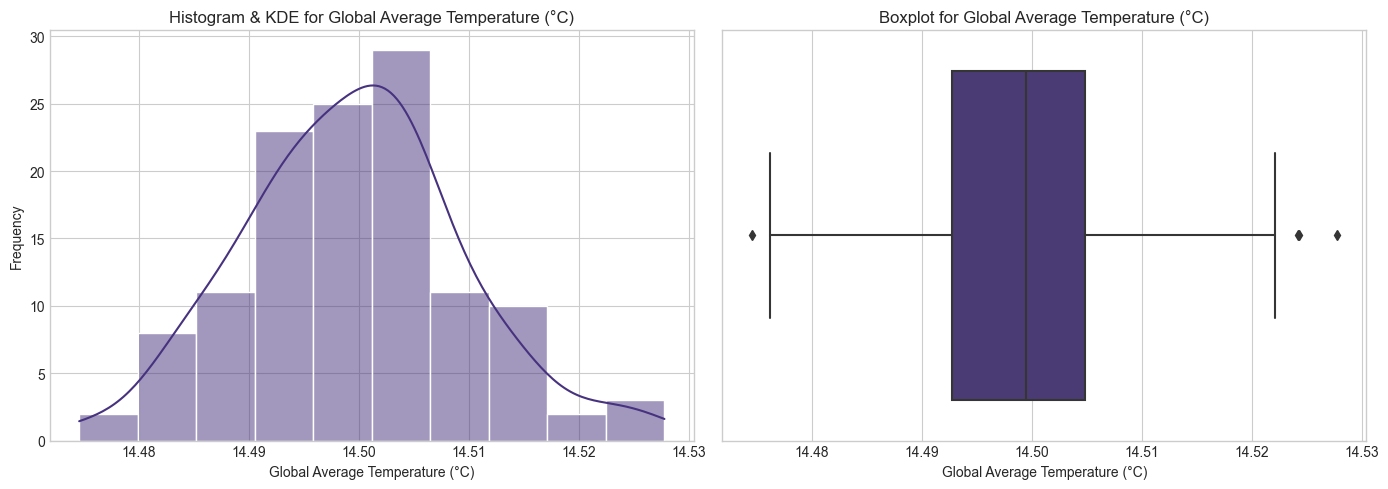

--- Univariate Analysis for CO2 Concentration (ppm) ---
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Mean: 350.0286255575196
Median: 350.02233369847306
Std: 0.4565349854904484
Min: 348.6422492005211
Max: 351.0032939759036




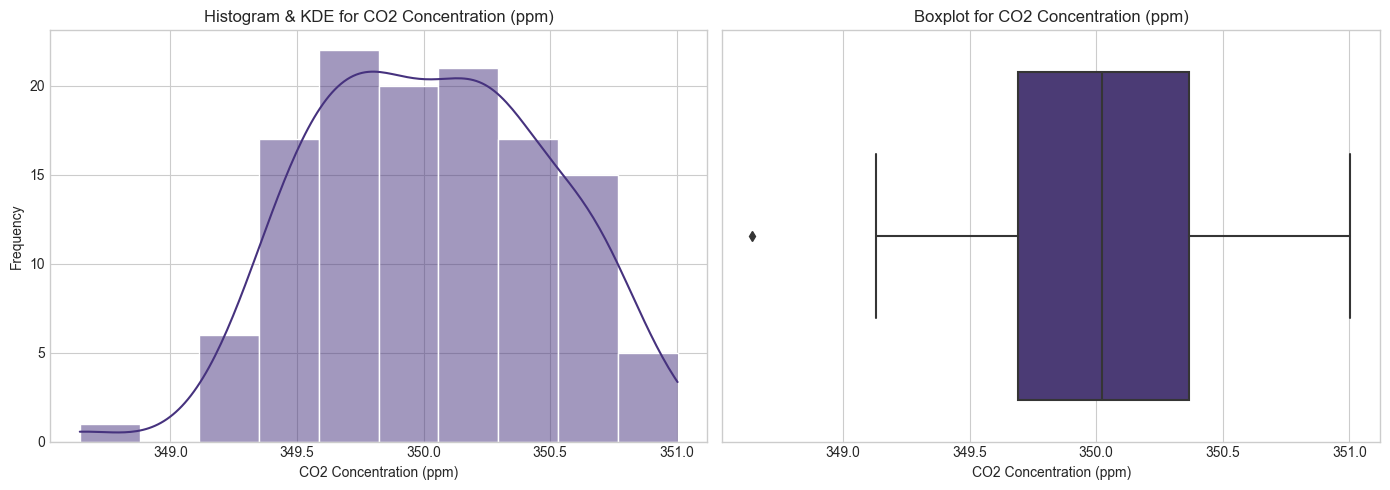

--- Univariate Analysis for Sea Level Rise (mm) ---
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Mean: 149.9888585272557
Median: 149.91806245822556
Std: 1.0320947333349417
Min: 148.0517482842852
Max: 152.6719442811802




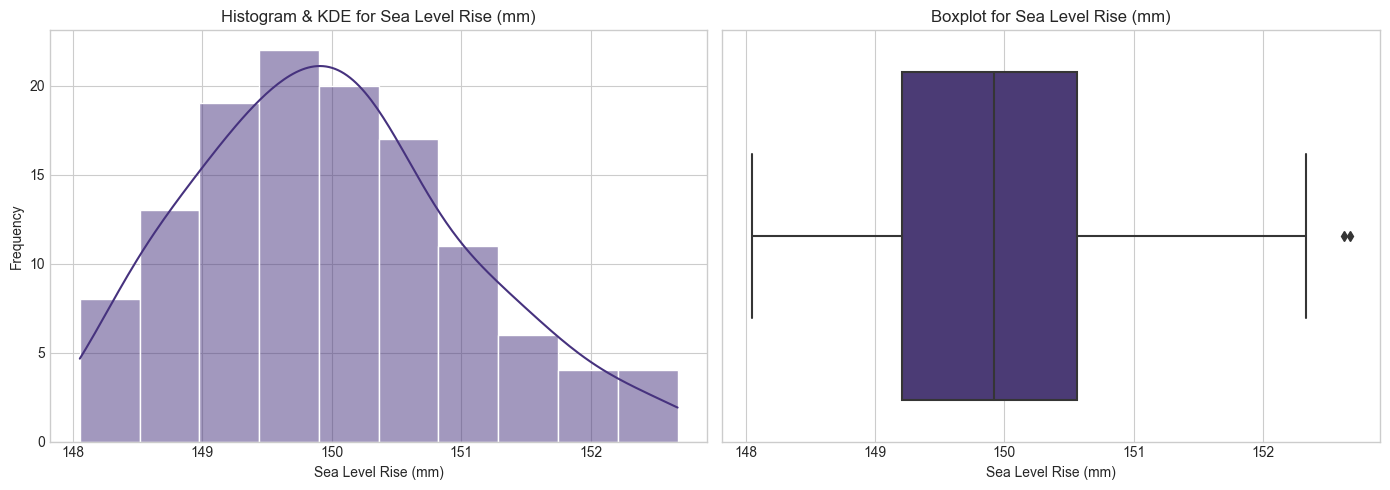

--- Univariate Analysis for Arctic Ice Area (million km²) ---
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Mean: 9.000885689000027
Median: 8.998274441362046
Std: 0.03754691083375366
Min: 8.893453349282296
Max: 9.101611424541607




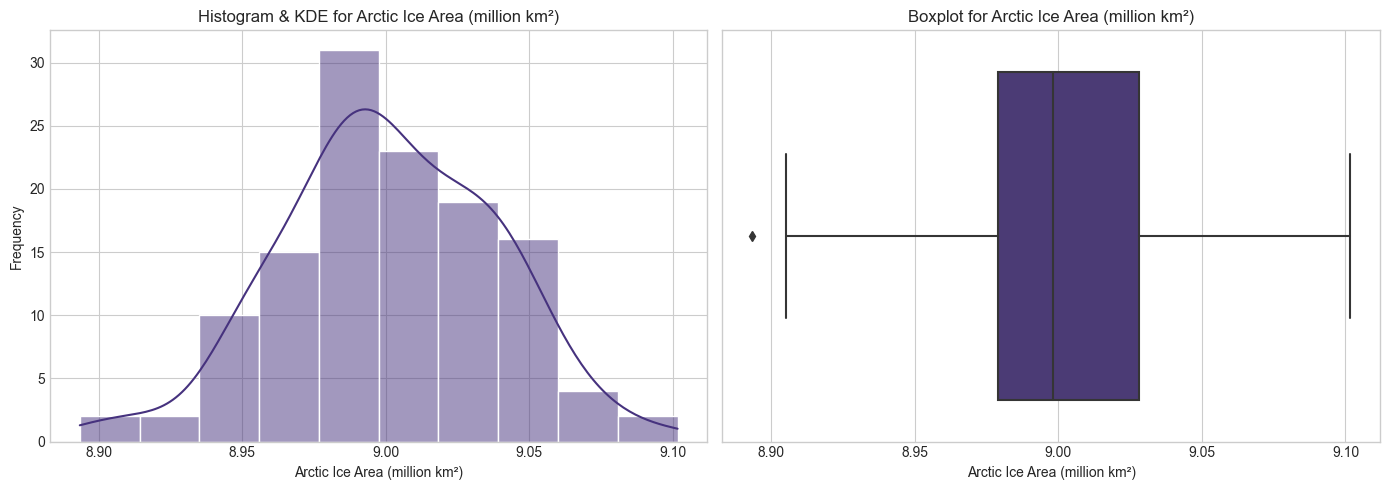

In [37]:
univariate_analysis(df1)

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

In [7]:
def multivariate_analysis(data, visualize=False):
    """
    Perform multivariate analysis by computing and optionally visualizing the correlation matrix.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing numeric variables.
    visualize (bool): If True, display a heatmap of the correlation matrix.
    
    Returns:
    pd.DataFrame: The correlation matrix.
    """
    # Compute the correlation matrix
    corr_matrix = data.corr()
    
    # Optionally visualize the correlation matrix
    if visualize:
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Matrix Heatmap")
        plt.tight_layout()
        plt.show()
    
    return corr_matrix


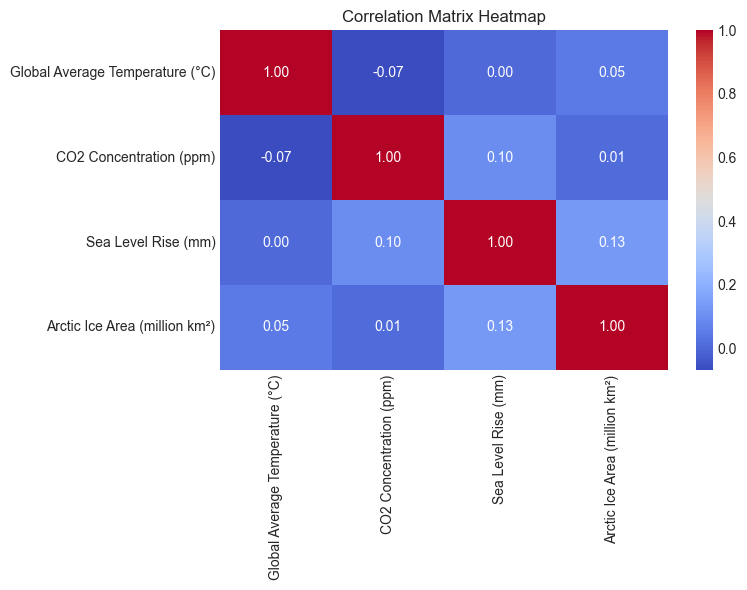

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Global Average Temperature (°C),1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),0.047027,0.009986,0.129528,1.000000


In [10]:
multivariate_analysis(df1, visualize=True)

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here